Parte 2

Utilize o dataset contido nesse <a href="https://www.kaggle.com/datasets/upadorprofzs/testes"> link </a>, e responda as questões abaixo. O dataset contém dados estatísticos do IBGE relativos à escolaridade, renda entre outros campos avaliados pela PNAD (Pesquisa Nacional por Amostra de Domicílios). Os dados podem representar informações relevantes e reveladoras sobre a distribuição de renda e possivelmente alguns indicadores sobre tais situações encontradas a partir dos dados.

In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dados = pd.read_csv('arquivo/dados/dados.csv') #carrega base de dados formato csv
dados.shape #quantidade de linhas e colunas do DataFrame
#dados.head #5 primeiros registros do DataFrame
#dados.isnull().count() #quantidade de dados nulos
#dados.info()

(76840, 7)

Dicionário de Dados:

UFs

In [327]:
ufs = pd.DataFrame({'codigo': [11, 12, 13, 14, 15, 16, 17, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 35, 41, 42, 43, 50, 51, 52, 53],
                   'descricao': ['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná', 'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal']})

Escolaridade (Anos de Estudo)

In [328]:
escolaridade = pd.DataFrame({'codigo': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],
                             'descricao': ['Sem instrução e menos de 1 ano' , '1 ano' , '2 anos' , '3 anos' , '4 anos' , '5 anos', '6 anos' , '7 anos' , '8 anos' , '9 anos' , '10 anos' , '11 anos' , '12 anos' , '13 anos' , '14 anos' , '15 anos ou mais' , 'Não determinados / Não aplicável']})

Raça

In [329]:
raca = pd.DataFrame({'codigo': [0, 2, 4, 6, 8, 9], 'descricao': ['Indígena' ,'Branca' ,'Preta' ,'Amarela' ,'Parda' ,'Sem declaração']})

Sexo

In [330]:
sexo = pd.DataFrame({'codigo': [0,1], 'descricao': ['Masculino', 'Feminino']})

1)Qual a quantidade de pessoas nas seguintes faixas etárias

In [331]:
#varrendo a base uma vez categorizando os dados por intervalo
dados['grupo_idade'] = pd.cut(x=dados['Idade'], bins=[0,20,35,50,65,200], labels=['<= 20', '<= 35', '<= 50', '<= 65', ' > 65'])
dados_grupo = dados.groupby('grupo_idade').count()
dados_grupo['Idade']

grupo_idade
<= 20      764
<= 35    20654
<= 50    31770
<= 65    20006
 > 65     3646
Name: Idade, dtype: int64

  a) 20 anos ou menos

In [332]:
#busca informações para a faixa de idades
idade_20 = dados.query('Idade <= 20')

#valida se o DataFrame retornado é vazio
if(idade_20.empty):
    #Imprime mensagem de que o DataFrame não possui dados
    print(f'Não há pessoas na base de dados com idade de 20 anos ou menos.')
else:
    #apresenta busca em tela
    print(f'Há {len(idade_20)} pessoas na base de dados com idade de 20 anos ou menos.')

Há 764 pessoas na base de dados com idade de 20 anos ou menos.


b) 21 a 35 anos

In [333]:
#busca informações para a faixa de idades
idade_21_35 = dados.query('Idade >= 21 & Idade <= 35')

#valida se o DataFrame retornado é vazio
if(idade_21_35.empty):
    #Imprime mensagem de que o DataFrame não possui dados
    print(f'Não há pessoas na base de dados com idade entre 21 anos e 35 anos.')
else:
    #apresenta busca em tela
    print(f'Há {len(idade_21_35)} pessoas na base de dados com idade entre 21 anos e 35 anos.')

Há 20654 pessoas na base de dados com idade entre 21 anos e 35 anos.


c) 36 a 50 anos

In [334]:
#busca informações para a faixa de idades
idade_36_50 = dados.query('Idade >= 36 & Idade <= 50')

#valida se o DataFrame retornado é vazio
if(idade_36_50.empty):
    #Imprime mensagem de que o DataFrame não possui dados
    print(f'Não há pessoas na base de dados com idade entre 36 anos e 50 anos.')
else:
    #apresenta busca em tela
    print(f'Há {len(idade_36_50)} pessoas na base de dados com idade entre 36 anos e 50 anos.')

Há 31770 pessoas na base de dados com idade entre 36 anos e 50 anos.


d) 51 a 65 anos

In [335]:
#busca informações para a faixa de idades
idade_51_65 = dados.query('Idade >= 51 & Idade <= 65')

#valida se o DataFrame retornado é vazio
if(idade_51_65.empty):
    #Imprime mensagem de que o DataFrame não possui dados
    print(f'Não há pessoas na base de dados com idade entre 51 anos e 65 anos.')
else:
    #apresenta busca em tela
    print(f'Há {len(idade_51_65)} pessoas na base de dados com idade entre 51 anos e 65 anos.')

Há 20006 pessoas na base de dados com idade entre 51 anos e 65 anos.


e) maiores de 65 anos

In [336]:
#busca informações para a faixa de idades
idade_65_mais = dados.query('Idade > 65')

#valida se o DataFrame retornado é vazio
if(idade_65_mais.empty):
    #Imprime mensagem de que o DataFrame não possui dados
    print(f'Não há pessoas na base de dados com idade superior a 65 anos.')
else:
    #apresenta busca em tela
    print(f'Há {len(idade_65_mais)} pessoas na base de dados com idade superior a 65 anos.')

Há 3646 pessoas na base de dados com idade superior a 65 anos.


2)Qual é a média de escolaridade em cada faixa etária?

a) 20 anos ou menos

In [337]:
#utiliza DataFrame idade_20 do exercicio 1 a)
#valida se o DataFrame está vazio
if(idade_20.empty):
    print(f'Não há pessoas na base de dados com idade de 20 anos ou menos.')
else:
    #calcula média da coluna "Anos de Estudo" para a idade
    media_idade_20 = idade_20['Anos de Estudo'].mean()
    #mostra informações em tela
    print(f'Média de escolaridade 20 anos ou menos: {media_idade_20:.2f} anos.')

Média de escolaridade 20 anos ou menos: 9.70 anos.


b) 21 a 35 anos

In [338]:
#utiliza DataFrame idade_21_35 do exercicio 1 b)
#valida se o DataFrame está vazio
if(idade_21_35.empty):
    print(f'Não há pessoas na base de dados com idade entre 21 anos e 35 anos.')
else:
    #calcula média da coluna "Anos de Estudo" para a idade
    media_idade_21_35 = idade_21_35['Anos de Estudo'].mean()
    #mostra informações em tela
    print(f'Média de escolaridade entre 21 anos e 35 anos: {media_idade_21_35:.2f} anos.')

Média de escolaridade entre 21 anos e 35 anos: 10.81 anos.


c) 36 a 50 anos

In [339]:
#utiliza DataFrame idade_36_50 do exercicio 1 c)
#valida se o DataFrame está vazio
if(idade_36_50.empty):
    print(f'Não há pessoas na base de dados com idade entre 36 anos e 50 anos.')
else:
    #calcula média da coluna "Anos de Estudo" para a idade
    media_idade_36_50 = idade_36_50['Anos de Estudo'].mean()
    #mostra informações em tela
    print(f'Média de escolaridade entre 36 anos e 50 anos: {media_idade_36_50:.2f} anos.')


Média de escolaridade entre 36 anos e 50 anos: 9.76 anos.


d) 51 a 65 anos

In [340]:
#utiliza DataFrame _idade_51_65 do exercicio 1 d)
#valida se o DataFrame está vazio
if(idade_51_65.empty):
    print(f'Não há pessoas na base de dados com idade entre 51 anos e 65 anos.')
else:
    #calcula média da coluna "Anos de Estudo" para a idade
    media_idade_51_65 = idade_51_65['Anos de Estudo'].mean()
    #mostra informações em tela
    print(f'Média de escolaridade entre 51 anos e 65 anos: {media_idade_51_65:.2f} anos.')

Média de escolaridade entre 51 anos e 65 anos: 8.27 anos.


e) maiores de 65 anos

In [341]:
#utiliza DataFrame idade_65_mais do exercicio 1 e)
#valida se o DataFrame está vazio
if(idade_65_mais.empty):
    print(f'Não há pessoas na base de dados com idade superiores a 65 anos.')
else:
    #calcula média da coluna "Anos de Estudo" para a idade)
    media_idade_65_mais = idade_65_mais['Anos de Estudo'].mean()
    #mostra informações em tela
    print(f'Média de escolaridade superior a 65 anos: {media_idade_65_mais:.2f} anos.')

Média de escolaridade superior a 65 anos: 5.84 anos.


3)Qual a UF que concentra a maior renda?


In [342]:
#retorna o índice do maior valor encontrado nas informações agrupadas pela coluna "UF", somando os valores da coluna "Renda"
dados_agrupados_uf_renda = dados.groupby('UF')['Renda'].sum().idxmax()

#busca no dicionário "ufs" o nome do estado correspondente ao índice encontrado
estado = ufs['descricao'][ufs['codigo'] == dados_agrupados_uf_renda].max()

#apresenta o nome doe stado em tela
print(f'Estado com maior concentração de renda: {estado}.')

Estado com maior concentração de renda: São Paulo.


4)Qual a renda média de pessoas pretas e brancas de homens e mulheres?

Pessoas pretas homens

In [343]:
#cria DataFrame com informações filtradas pelas colunas "Cor" 4 ("Preta") e "Sexo" 0 ("Masculino")
pessoas_pretas_homens = dados.query('Cor == 4 & Sexo == 0')
#verifica se o DataFrame é vazio
if (pessoas_pretas_homens.empty):
    #se DataFrame vazio, imprime em tela mensagem
    print(f'Não há pessoas pretas homens na base de dados.')
else:
    #se DataFrame com informações, calcula média para a coluna "Renda"
    media_pessoas_pretas_homens = pessoas_pretas_homens['Renda'].mean()
    #imprime média da coluna "Renda" na tela
    print(f'Média de renda de pessoas pretas homens: R$ {media_pessoas_pretas_homens:.2f}.')

Média de renda de pessoas pretas homens: R$ 1603.86.


Pessoas pretas mulheres

In [344]:

#cria DataFrame com informações filtradas pelas colunas "Cor" 4 ("Preta") e "Sexo" 1 ("Feminina")
pessoas_pretas_mulheres = dados.query('Cor == 4 & Sexo == 1')
#verifica se o DataFrame é vazio
if (pessoas_pretas_mulheres.empty):
    #se DataFrame vazio, imprime em tela mensagem
    print(f'Não há pessoas pretas mulheres na base de dados.')
else:
    #se DataFrame com informações, calcula média para a coluna "Renda"
    media_pessoas_pretas_mulheres = pessoas_pretas_mulheres['Renda'].mean()
    #imprime média da coluna "Renda" na tela
    print(f'Média de renda de pessoas pretas mulheres: R$ {media_pessoas_pretas_mulheres:.2f}.')

Média de renda de pessoas pretas mulheres: R$ 1134.60.


Pessoas brancas homens

In [345]:

#cria DataFrame com informações filtradas pelas colunas "Cor" 2 ("Branca") e "Sexo" 0 ("Masculino")
pessoas_brancas_homens = dados.query('Cor == 2 & Sexo == 0')
#verifica se o DataFrame é vazio
if (pessoas_brancas_homens.empty):
    #se DataFrame vazio, imprime em tela mensagem
    print(f'Não há pessoas brancas homens na base de dados.')
else:
    #se DataFrame com informações, calcula média para a coluna "Renda"
    media_pessoas_brancas_homens = pessoas_brancas_homens['Renda'].mean()
    #imprime média da coluna "Renda" na tela
    print(f'Média de renda de pessoas brancas homens: R$ {media_pessoas_brancas_homens:.2f}.')

Média de renda de pessoas brancas homens: R$ 2925.74.


Pessoas brancas mulheres

In [346]:

#cria DataFrame com informações filtradas pelas colunas "Cor" 2 ("Branca") e "Sexo" 1 ("Feminina")
pessoas_brancas_mulheres = dados.query('Cor == 2 & Sexo == 1')
#verifica se o DataFrame é vazio
if (pessoas_brancas_mulheres.empty):
    #se DataFrame vazio, imprime em tela mensagem
    print(f'Não há pessoas brancas mulheres na base de dados.')
else:
    #se DataFrame com informações, calcula média para a coluna "Renda"
    media_pessoas_brancas_mulheres = pessoas_brancas_mulheres['Renda'].mean()
    print(f'Média de renda de pessoas brancas mulheres: R$ {media_pessoas_brancas_mulheres:.2f}.')

Média de renda de pessoas brancas mulheres: R$ 2109.87.


5)Qual a renda média concentrada em cada faixa etária?

a) 20 anos ou menos

In [347]:
#valida se o DataFrame está vazio
if (idade_20.empty):
    #se estiver vazio,  iprime em tela inexistência de dados
    print(f'Não há pessoas na faixa etária 20 anos ou menos na base de dados.')
else:
    #se DataFrame possui dados, calcula média da coluna "Renda" para dados na faixa etária
    renda_idade_20 = idade_20['Renda'].mean()
    #imprime média da coluna "Renda" em tela
    print(f'Renda média faixa etária 20 anos ou menos: R$ {renda_idade_20:.2f}.')

Renda média faixa etária 20 anos ou menos: R$ 985.35.


b) 21 a 35 anos

In [348]:
#valida se o DataFrame está vazio
if (idade_21_35.empty):
    #se estiver vazio,  iprime em tela inexistência de dados
    print(f'Não há pessoas na faixa etária de 21 anos a 35 anos na base de dados.')
else:
    #se DataFrame possui dados, calcula média da coluna "Renda" para dados na faixa etária
    renda_idade_21_35 = idade_21_35['Renda'].mean()
    #imprime média da coluna "Renda" em tela
    print(f'Renda média faixa etária entre 21 anos e 35 anos: R$ {renda_idade_21_35:.2f}.')

Renda média faixa etária entre 21 anos e 35 anos: R$ 1748.29.


c) 36 a 50 anos

In [349]:
#valida se o DataFrame está vazio
if (idade_36_50.empty):
    #se estiver vazio,  iprime em tela inexistência de dados
    print(f'Não há pessoas na faixa etária de 36 anos a 50 anos na base de dados.')
else:
    #se DataFrame possui dados, calcula média da coluna "Renda" para dados na faixa etária
    renda_idade_36_50 = idade_36_50['Renda'].mean()
    #imprime média da coluna "Renda" em tela
    print(f'Renda média faixa etária entre 36 anos e 50 anos: R$ {renda_idade_36_50:.2f}.')

Renda média faixa etária entre 36 anos e 50 anos: R$ 2113.76.


d) 51 a 65 anos

In [350]:
#valida se o DataFrame está vazio
if (idade_51_65.empty):
    #se estiver vazio,  iprime em tela inexistência de dados
    print(f'Não há pessoas na faixa etária de 51 anos a 65 anos na base de dados.')
else:
    #se DataFrame possui dados, calcula média da coluna "Renda" para dados na faixa etária
    renda_idade_51_65 = idade_51_65['Renda'].mean()
    #imprime média da coluna "Renda" em tela
    print(f'Renda média faixa etária entre 51 anos e 65 anos: R$ {renda_idade_51_65:.2f}.')

Renda média faixa etária entre 51 anos e 65 anos: R$ 2150.20.


e) maiores de 65 anos

In [351]:
#valida se o DataFrame está vazio
if (idade_65_mais.empty):
    #se estiver vazio,  iprime em tela inexistência de dados
    print(f'Não há pessoas na faixa etária superior a 65 anos na base de dados.')
else:
    #se DataFrame possui dados, calcula média da coluna "Renda" para dados na faixa etária
    renda_idade_65_mais = idade_65_mais['Renda'].mean()
    print(f'Renda média faixa etária superior aos 65 anos: R$ {renda_idade_65_mais:.2f}.')

Renda média faixa etária superior aos 65 anos: R$ 1831.23.


6)Qual a renda média nas faixas de anos de estudo abaixo?

 a) 2 anos ou menos

In [352]:
#cria DataFrame com informações para a faixa etária
idade_2_anos_menos = dados.query('Idade <= 2')

#valida se o DataFrame não está vazio
if(idade_2_anos_menos.empty):
    #se DataFrame vazio, informa inexistência de dados em tela
    print(f'Não há pessoas na faixa etária 2 anos ou menos.')
else:
    #se DataFrame com informações, calcula média da coluna "Renda"
    renda_idade_2_anos_menos = idade_2_anos_menos['Renda'].mean()
    #apresenta média da coluna "Renda" em tela
    print(f'Renda média faixa etária 2 anos ou menos: R$ {renda_idade_2_anos_menos:.2f}.')

Não há pessoas na faixa etária 2 anos ou menos.


b) 3 a 6 anos

In [353]:
#cria DataFrame com informações para a faixa etária
idade_3_6_anos = dados.query('Idade >= 3 & Idade <= 6')

#valida se o DataFrame não está vazio
if(idade_3_6_anos.empty):
    #se DataFrame vazio, informa inexistência de dados em tela
    print(f'Não há pessoas na faixa etária entre 3 anos e 6 anos.')
else:
     #se DataFrame com informações, calcula média da coluna "Renda"
    renda_idade_3_6_anos = idade_3_6_anos['Renda'].mean()
    #apresenta média da coluna "Renda" em tela
    print(f'Renda média faixa etária entre 3 anos e 6 anos: R$ {renda_idade_3_6_anos:.2f}.')

Não há pessoas na faixa etária entre 3 anos e 6 anos.


c) 7 a 10 anos

In [354]:
#cria DataFrame com informações para a faixa etária
idade_7_10_anos = dados.query('Idade >= 7 & Idade <= 10')

#valida se o DataFrame não está vazio
if(idade_7_10_anos.empty):
    #se DataFrame vazio, informa inexistência de dados em tela
    print(f'Não há pessoas na faixa etária entre 7 anos e 10 anos.')
else:
    #se DataFrame com informações, calcula média da coluna "Renda"
    renda_idade_7_10_anos = idade_7_10_anos['Renda'].mean()
    #apresenta média da coluna "Renda" em tela
    print(f'Renda média faixa etária entre 7 anos e 10 anos: R$ {renda_idade_7_10_anos:.2f}.')  

Não há pessoas na faixa etária entre 7 anos e 10 anos.


d) 10 a 12 anos

In [355]:
#cria DataFrame com informações para a faixa etária
idade_10_12_anos = dados.query('Idade >= 10 & Idade <= 12')

#valida se o DataFrame não está vazio
if(idade_10_12_anos.empty):
    #se DataFrame vazio, informa inexistência de dados em tela
    print(f'Não há pessoas na faixa etária entre 10 anos e 12 anos.')
else:
    #se DataFrame com informações, calcula média da coluna "Renda"
    renda_idade_10_12_anos = idade_10_12_anos['Renda'].mean()
    #apresenta média da coluna "Renda" em tela
    print(f'Renda média faixa etária entre 10 anos e 12 anos: R$ {renda_idade_10_12_anos:.2f}.')

Não há pessoas na faixa etária entre 10 anos e 12 anos.


e) 13 anos ou mais

In [356]:
#cria DataFrame com informações para a faixa etária
idade_13_anos_mais = dados.query('Idade >= 13')

#valida se o DataFrame não está vazio
if(idade_13_anos_mais.empty):
    #se DataFrame vazio, informa inexistência de dados em tela
    print(f'Não há pessoas na faixa etária entre 13 anos.')
else:
    #se DataFrame com informações, calcula média da coluna "Renda"
    renda_idade_13_anos_mais = idade_13_anos_mais['Renda'].mean()
    #apresenta média da coluna "Renda" em tela
    print(f'Renda média faixa etária entre 13 anos: R$ {renda_idade_13_anos_mais:.2f}.')

Renda média faixa etária entre 13 anos: R$ 2000.38.


7) Qual a maior escolaridade entre indígenas, para homens e mulheres?

Indígenas homens

In [357]:
#cria DataFrame com informações filtradas pelas colunas "Cor" e "Sexo" apontada
dados_indigenas_homens = dados.query('Cor == 0 & Sexo == 0')

#valida se o DataFrame é vazio
if (dados_indigenas_homens.empty):
    #imprime em tela que não há informações no DataFrame
    print('Não há pessoas indígenas homens na base de dados.')
else:
    #encontra no DataFrame o índice da coluna "Anos de Estudo" que possui a maior quantidade de registros
    escolaridade_indigenas_homens = dados_indigenas_homens['Anos de Estudo'].value_counts().idxmax()
    #busca valor da coluna "Anos de Estudo" no DataFrame "escolaridade"
    descricao_escolaridade_homens = escolaridade['descricao'][escolaridade['codigo'] == escolaridade_indigenas_homens].max()
    #imprime em tela o valor da coluna "Anos de Estudo" que possui a maior quantidade de registros
    print(f'Maior escolaridade encontrada para indígenas homens: {descricao_escolaridade_homens}')

Maior escolaridade encontrada para indígenas homens: 11 anos


Indígenas mulheres

In [358]:
#cria DataFrame com informações filtradas pelas colunas "Cor" e "Sexo" apontada
dados_indigenas_mulheres = dados.query('Cor == 0 & Sexo == 1')

#valida se o DataFrame é vazio
if (dados_indigenas_mulheres.empty):
    #imprime em tela que não há informações no DataFrame
    print('Não há pessoas indígenas mulheres na base de dados.')
else:
    #encontra no DataFrame o índice da coluna "Anos de Estudo" que possui a maior quantidade de registros
    escolaridade_indigenas_mulheres = dados_indigenas_mulheres['Anos de Estudo'].value_counts().idxmax()
    #busca valor da coluna "Anos de Estudo" no DataFrame "escolaridade"
    descricao_escolaridade_mulheres = escolaridade['descricao'][escolaridade['codigo'] == escolaridade_indigenas_mulheres].max()
    #imprime em tela o valor da coluna "Anos de Estudo" que possui a maior quantidade de registros
    print(f'Maior escolaridade encontrada para indígenas mulheres: {descricao_escolaridade_mulheres}')

Maior escolaridade encontrada para indígenas mulheres: 11 anos


In [359]:
if(escolaridade_indigenas_homens > escolaridade_indigenas_mulheres):
    print(f'A maior escolaridade de indígenas homens ({descricao_escolaridade_homens}) é maior que a maior escolaridade de indígenas mulheres ({descricao_escolaridade_mulheres}).')
elif(escolaridade_indigenas_homens < escolaridade_indigenas_mulheres):
    print(f'A maior escolaridade de indígenas mulheres ({descricao_escolaridade_mulheres}) é maior que a maior escolaridade de indígenas homens ({descricao_escolaridade_homens}).')
else:
    print(f'A maior escolaridade de indígenas homens é igual a maior escolaridade de indígenas mulheres: {descricao_escolaridade_homens}.')

A maior escolaridade de indígenas homens é igual a maior escolaridade de indígenas mulheres: 11 anos.


8) Qual a média de anos de estudo entre brancos e negros?

Brancos

In [360]:
#cria DataFrame com informações filtradas pela coluna "Cor" (2 - "Branco")
dados_brancos = dados.query('Cor == 2')

#valida se o DataFrame é vazio
if (dados_brancos.empty):
    #imprime em tela que não há informações no DataFrame
    print('Não há pessoas brancas na base de dados.')
else:
    #encontra no DataFrame a média para a coluna "Anos de Estudo"
    media_anos_de_estudo_brancos = dados_brancos['Anos de Estudo'].mean()
    #busca valor da coluna "Anos de Estudo" no DataFrame "escolaridade"
    descricao_escolaridade_brancos = escolaridade['descricao'][escolaridade['codigo'] == round(media_anos_de_estudo_brancos)].max()
    #imprime em tela o valor da média para a coluna "Anos de Estudo"
    print(f'A média de "Anos de Estudo" para brancos é: {descricao_escolaridade_brancos}.')

A média de "Anos de Estudo" para brancos é: 9 anos.


Negros

In [361]:
#cria DataFrame com informações filtradas pela coluna "Cor" (2 - "Preta")
dados_pretos = dados.query('Cor == 4')

#valida se o DataFrame é vazio
if (dados_pretos.empty):
    #imprime em tela que não há informações no DataFrame
    print('Não há pessoas brancas na base de dados.')
else:
    #encontra no DataFrame a média para a coluna "Anos de Estudo"
    media_anos_de_estudo_pretos = dados_pretos['Anos de Estudo'].mean()
    #busca valor da coluna "Anos de Estudo" no DataFrame "escolaridade"
    descricao_escolaridade_pretos = escolaridade['descricao'][escolaridade['codigo'] == round(media_anos_de_estudo_pretos)].max()
    #imprime em tela o valor da média para a coluna "Anos de Estudo"
    print(f'A média de "Anos de Estudo" para brancos é: {descricao_escolaridade_pretos}.')

A média de "Anos de Estudo" para brancos é: 8 anos.


9) Qual a média de anos de estudo e de renda para mulheres brancas, e para mulheres negras?

Media de Estudo Mulheres Brancas

In [362]:
#cria DataFrame com informações filtradas pelas colunas "Sexo" (1 - Mulheres) e  "Cor" (2 - "Branca")
dados_mulheres_brancas = dados.query('Sexo == 1 & Cor == 2')

#valida se o DataFrame é vazio
if (dados_mulheres_brancas.empty):
    #imprime em tela que não há informações no DataFrame
    print('Não há mulheres brancas na base de dados.')
else:
    #encontra no DataFrame a média para a coluna "Anos de Estudo"
    media_anos_de_estudo_mulheres_brancas = dados_mulheres_brancas['Anos de Estudo'].mean()
    #busca valor da coluna "Anos de Estudo" no DataFrame "escolaridade"
    descricao_escolaridade_mulheres_brancas = escolaridade['descricao'][escolaridade['codigo'] == round(media_anos_de_estudo_mulheres_brancas)].max()
    #imprime em tela o valor da média para a coluna "Anos de Estudo"
    print(f'A média de "Anos de Estudo" para mulheres brancas é: {descricao_escolaridade_mulheres_brancas}.')        

A média de "Anos de Estudo" para mulheres brancas é: 10 anos.


Media de Renda Mulheres Brancas

In [363]:
#valida se o DataFrame é vazio
if (dados_mulheres_brancas.empty):
    #imprime em tela que não há informações no DataFrame
    print('Não há mulheres brancas na base de dados.')
else:
    #encontra no DataFrame a média para a coluna "Renda"
    media_renda_mulheres_brancas = dados_mulheres_brancas['Renda'].mean()    
    #imprime em tela o valor da média para a coluna "Renda"
    print(f'A média de "Renda" para mulheres brancas é R$: {media_renda_mulheres_brancas:.2f}.')    

A média de "Renda" para mulheres brancas é R$: 2109.87.


Media de Estudo Mulheres Negras

In [364]:
#cria DataFrame com informações filtradas pelas colunas "Sexo" (1 - Mulheres) e  "Cor" (4 - "Preta")
dados_mulheres_pretas = dados.query('Sexo == 1 & Cor == 4')

#valida se o DataFrame é vazio
if (dados_mulheres_pretas.empty):
    #imprime em tela que não há informações no DataFrame
    print('Não há mulheres pretas na base de dados.')
else:
    #encontra no DataFrame a média para a coluna "Anos de Estudo"
    media_anos_de_estudo_mulheres_pretas = dados_mulheres_pretas['Anos de Estudo'].mean()
    #busca valor da coluna "Anos de Estudo" no DataFrame "escolaridade"
    descricao_escolaridade_mulheres_pretas = escolaridade['descricao'][escolaridade['codigo'] == round(media_anos_de_estudo_mulheres_pretas)].max()
    #imprime em tela o valor da média para a coluna "Anos de Estudo"
    print(f'A média de "Anos de Estudo" para mulheres negras é: {descricao_escolaridade_mulheres_pretas}.')        

A média de "Anos de Estudo" para mulheres negras é: 9 anos.


Media de Renda Mulheres Negras

In [365]:
#valida se o DataFrame é vazio
if (dados_mulheres_pretas.empty):
    #imprime em tela que não há informações no DataFrame
    print('Não há mulheres pretas na base de dados.')
else:
    #encontra no DataFrame a média para a coluna "Renda"
    media_renda_mulheres_pretas = dados_mulheres_pretas['Renda'].mean()    
    #imprime em tela o valor da média para a coluna "Renda"
    print(f'A média de "Renda" para mulheres pretas é R$: {media_renda_mulheres_pretas:.2f}.')  

A média de "Renda" para mulheres pretas é R$: 1134.60.


10) Qual é a UF com maior média de escolaridade e qual a UF com maior média de renda?

UF com maior média de escolaridade

In [366]:
#cria DataFrame com informações de média da coluna "Escolaridade" agrupadas pela coluna "UF"
maior_media_anos_de_estudo_por_ufs = dados.groupby('UF')['Anos de Estudo'].mean().max()
uf_maior_media_ano_de_estudo = dados.groupby('UF')['Anos de Estudo'].mean().idxmax()

#busca valor da coluna "Anos de Estudo" no DataFrame "escolaridade"
descricao_maior_escolaridade = escolaridade['descricao'][escolaridade['codigo'] == round(maior_media_anos_de_estudo_por_ufs)].max()

#busca valor da coluna "UF" no DataFrame "ufs"
descricao_uf = ufs['descricao'][ufs['codigo'] == uf_maior_media_ano_de_estudo].max()

#imprime informações na tela
print(f'A UF "{descricao_uf}" possui a maior média de escolaridade: {descricao_maior_escolaridade}.')

A UF "Distrito Federal" possui a maior média de escolaridade: 11 anos.


UF com maior média de renda

In [367]:
#cria DataFrame com informações de média da coluna "Renda" agrupadas pela coluna "UF"
maior_media_renda_por_ufs = dados.groupby('UF')['Renda'].mean().max()
uf_maior_media_renda = dados.groupby('UF')['Renda'].mean().idxmax()

#busca valor da coluna "UF" no DataFrame "ufs"
descricao_uf = ufs['descricao'][ufs['codigo'] == uf_maior_media_renda].max()

#imprime informações na tela
print(f'A UF "{descricao_uf}" possui a maior média de renda: R$ {maior_media_renda_por_ufs:.2f}.')

A UF "Distrito Federal" possui a maior média de renda: R$ 4241.95.


11) Elabore você uma pergunta sobre a base de dados e escreva o código para responder a pergunta.

Dentre pessoas negras, qual região do país detém a maior média de renda para este grupo?

In [368]:
#filtro para classificação das UFs por região
filtro = {'Norte': 'UF <= 20', 'Nordeste': 'UF > 20 & UF <= 30', 'Sudeste': '(UF > 30 & UF <= 40)', 'Sul': 'UF > 40 & UF < 50', 'Centro Oeste': 'UF >= 50'}

#dicionário onde será armazenado as médias de renda por região
dados_pessoas_negras_regiao = {}

#cria DataFrame filtrando pela coluna "Cor" (4 - Preta)
dados_pessoas_negras = dados.query('Cor == 4')

#Processa o dicionário filtro selecionando chave e valor a cada iteração
for idx, value in filtro.items():
    #atribui a cada posição do dicionário a região e sua média de "Renda"    
    dados_pessoas_negras_regiao.setdefault(idx, dados_pessoas_negras.query(filtro[idx])['Renda'].mean().round(2))
    
media_renda_regiao_maior_media = dados_pessoas_negras_regiao[max(dados_pessoas_negras_regiao, key=dados_pessoas_negras_regiao.get)]
nome_regiao_maior_media_renda = max(dados_pessoas_negras_regiao, key=dados_pessoas_negras_regiao.get)

#imprime em tela a região com maior média encontrada no dicionário de médias de renda por região
print(f'A região "{nome_regiao_maior_media_renda}" do país é a região onde as pessoas de raça negra possuem \n'
      f'a maior média de renda se comparado para o mesmo grupo: renda média de R$ {media_renda_regiao_maior_media:.2f}')

A região "Centro Oeste" do país é a região onde as pessoas de raça negra possuem 
a maior média de renda se comparado para o mesmo grupo: renda média de R$ 1904.70


Há algum estado que influencia nesta média?

In [369]:
#encontra no dicionário "filtro" a região com maior média da coluna "Renda"
filtro_regiao_maior_media = filtro.get(max(dados_pessoas_negras_regiao, key=dados_pessoas_negras_regiao.get), 0)

#cria DataFrame com médias da coluna "Renda" para cada "UF"
dados_pessoas_negras_regiao_maior_media = dados_pessoas_negras.query(filtro_regiao_maior_media)
media_pessoas_negras_regiao_maior_media = dados_pessoas_negras_regiao_maior_media.groupby('UF')['Renda'].mean()

#imprime a região de maior média da coluna "Renda" e as médias de "Renda" para cada "UF"
print(f'Média de renda dos Estados da região "{max(dados_pessoas_negras_regiao, key=dados_pessoas_negras_regiao.get)}": \n {media_pessoas_negras_regiao_maior_media.iloc[:]}\n')

#aponta o estado com maior média de da coluna "Renda"
estado_maior_media_renda_regiao = media_pessoas_negras_regiao_maior_media.idxmax()

#cria filtro para busca retirando o estado com maior média da coluna "Renda" na região
novo_filtro = 'UF != ' + str(estado_maior_media_renda_regiao)

#recupera o nome do estado com maior média da coluna "Renda" na região
nome_estado_maior_media_renda_regiao = ufs['descricao'][ufs['codigo'] == estado_maior_media_renda_regiao].max()

#encontra média da região sem o estado com maior média da coluna "Renda"
media_renda_regiao_sem_estado_maior_media = dados_pessoas_negras_regiao_maior_media.query(novo_filtro)['Renda'].mean()

#imprime em tela informações do estado com maior média da coluna "Renda", média da coluna "Renda" sem este estado
print(f'Retirando a média de "Renda" do estado "{nome_estado_maior_media_renda_regiao}", maior média de "Renda" nesta região, \n'
      f'a média de "Renda" da região fica em R$ {media_renda_regiao_sem_estado_maior_media:.2f}.\n')

#calcula percentual da média de "Renda" da região sem o estado de maior média em relação a mesma média contendo o referido estado
percentual_queda_media_sem_estado_maior_media = (media_renda_regiao_sem_estado_maior_media * 100) / media_renda_regiao_maior_media

#imprime informações acerca da média e do percentual encontrados
print(f'A média de "Renda" da região "{nome_regiao_maior_media_renda}" sem o estado \n'
      f'"{nome_estado_maior_media_renda_regiao}" corresponde há {percentual_queda_media_sem_estado_maior_media:.2f}% '
      f'da média de "Renda" contendo este estado.')

percentual = 10

#Verifica a diferença em percentual da média da coluna "Renda" da região com e sem o estado de maior média da coluna "Renda"
if(100 - percentual_queda_media_sem_estado_maior_media) > percentual:
    print('\nDesta forma, pode-se diser de que o referido estado influencia diretamente na média de "Renda" da região.')
else:
    print('\nDesta forma, pode-se diser de que o referido estado não influencia significamente na média de "Renda" da região.')

Média de renda dos Estados da região "Centro Oeste": 
 UF
50    1500.841463
51    1822.119048
52    1584.633028
53    2555.583691
Name: Renda, dtype: float64

Retirando a média de "Renda" do estado "Distrito Federal", maior média de "Renda" nesta região, 
a média de "Renda" da região fica em R$ 1641.87.

A média de "Renda" da região "Centro Oeste" sem o estado 
"Distrito Federal" corresponde há 86.20% da média de "Renda" contendo este estado.

Desta forma, pode-se diser de que o referido estado influencia diretamente na média de "Renda" da região.


Mapa do Brasil com Média de Renda de Pessoas Negras por Estado

In [370]:
#definição de variáveis de cores
cor_1 = (0, 255, 0) #verde
cor_2 = (255, 0, 0) #azul
cor_3 = (255, 0, 255) #rosa
cor_vermelha = (0, 0, 255) #vermelho
cor_preta = (0,0,0) #preto

#dicionário contendo estados e coordenadas x e y fixas para a figura selecionada 
estados_coordenadas = {'Rondônia': [173, 260], 'Acre': [77, 239], 'Amazonas': [149, 164], 'Roraima': [195, 67], 
                       'Pará': [323, 173], 'Amapá': [337, 72], 'Tocantins': [386, 252], 'Maranhão': [432, 173], 
                       'Piauí': [465, 211], 'Ceará': [522, 172], 'Rio Grande do Norte': [564, 182], 'Paraíba': [570, 203], 
                       'Pernambuco': [543, 219], 'Alagoas': [564, 242], 'Sergipe': [549, 253], 'Bahia': [481, 275], 
                       'Minas Gerais': [436, 373], 'Espírito Santo': [496, 386], 'Rio de Janeiro': [462, 428], 
                       'São Paulo': [380, 422], 'Paraná': [334, 455], 'Santa Catarina': [355, 498], 
                       'Rio Grande do Sul': [315, 531], 'Mato Grosso do Sul': [288, 397], 'Mato Grosso': [279, 290], 
                       'Goiás': [360, 334],  'Distrito Federal': [395, 325]}

In [371]:
#função para determinar cor, tamanho da figura e tamanho da linha da figura desenhada na figura
def classifica_tamanho_cor_figura(data_frame: pd.DataFrame, campo: str, renda_media: float):
    if(renda_media) <= (data_frame[campo].describe().loc['25%']):
        cor = cor_1
        tamanho_figura = 3
        tamanho_linha = 2
    elif (renda_media > data_frame[campo].describe().loc['25%']) and (renda_media <= data_frame[campo].describe().loc['50%']):
        cor = cor_2
        tamanho_figura = 5
        tamanho_linha = 2
    elif (renda_media > data_frame[campo].describe().loc['50%']) and (renda_media <= data_frame[campo].describe().loc['75%']):
        cor = cor_3
        tamanho_figura = 7
        tamanho_linha = 2
    else: 
        cor = cor_vermelha
        tamanho_figura = 9
        tamanho_linha = 2
    return tamanho_figura, cor, tamanho_linha
cor_2 = (255, 0, 0) #azul

In [380]:
import cv2

#definir caminho da imagem 
path_imagem = 'arquivo/imagem/mapa_brasil_estados.jpg'

#carrega e apresenta características da imagem
imagem_1 = cv2.imread(path_imagem)
imagem_1 = cv2.resize(imagem_1, (600,600))
print('Largura em pixels: ', end='')
print(imagem_1.shape[1]) #largura da imagem
print('Altura em pixels: ', end='')
print(imagem_1.shape[0]) #altura da imagem
print('Qtde de canais: ', end='')
print(imagem_1.shape[2])

Largura em pixels: 600
Altura em pixels: 600
Qtde de canais: 3


In [381]:
#criação do DataFrame
media_renda_pessoas_negras_por_estado = dados_pessoas_negras.groupby('UF')['Renda'].mean().round(2).reset_index()
media_renda_pessoas_negras_por_estado.columns = ['Estado', 'Renda_Media']

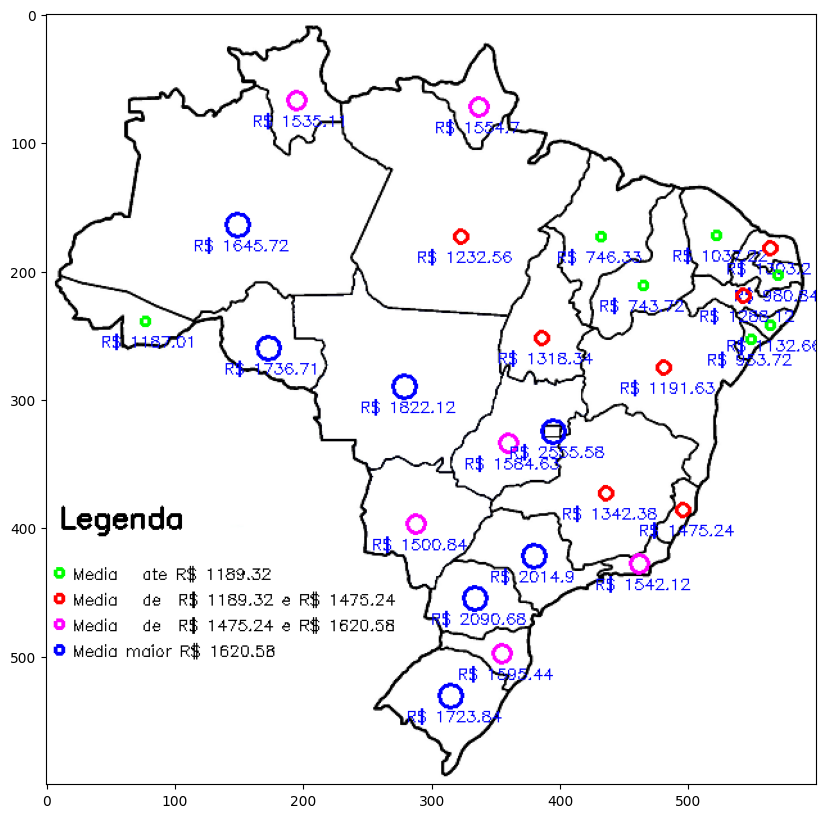

In [391]:
#manipulando com OpenCV
#montagem do mapa com figuras
for i in range(len(media_renda_pessoas_negras_por_estado)):
    uf = ufs["descricao"][ufs["codigo"] == media_renda_pessoas_negras_por_estado.iloc[i,0]].max()
    tamanho_figura, cor, tamanho_linha = classifica_tamanho_cor_figura(media_renda_pessoas_negras_por_estado, 'Renda_Media', media_renda_pessoas_negras_por_estado.iloc[i,1])
    cv2.circle(imagem_1, estados_coordenadas[uf], tamanho_figura, cor, tamanho_linha) 
    cv2.putText(imagem_1, 'R$ ' + str(media_renda_pessoas_negras_por_estado.iloc[i,1]), list(map(lambda x,y: x+y, estados_coordenadas[uf], [-35, 20])), cv2.FONT_HERSHEY_SIMPLEX,0.40,cor_vermelha,1)

#legenda aplicada na imagem
cv2.putText(imagem_1,'Legenda',(10,400),cv2.FONT_HERSHEY_SIMPLEX,0.75,cor_preta,2)
cv2.circle(imagem_1, (10, 435), 3, cor_1, 2)
cv2.putText(imagem_1,'Media   ate R$ ' + str(media_renda_pessoas_negras_por_estado['Renda_Media'].describe().loc['25%'].round(2)),(20,440),cv2.FONT_HERSHEY_SIMPLEX,0.40,cor_preta,1)
cv2.circle(imagem_1, (10, 455), 3, cor_2, 2)
cv2.putText(imagem_1,'Media   de  R$ ' + str(media_renda_pessoas_negras_por_estado['Renda_Media'].describe().loc['25%'].round(2)) + ' e R$ ' + str(media_renda_pessoas_negras_por_estado['Renda_Media'].describe().loc['50%']),(20,460),cv2.FONT_HERSHEY_SIMPLEX,0.40,cor_preta,1)
cv2.circle(imagem_1, (10, 475), 3, cor_3, 2)
cv2.putText(imagem_1,'Media   de  R$ ' + str(media_renda_pessoas_negras_por_estado['Renda_Media'].describe().loc['50%'].round(2)) + ' e R$ ' + str(media_renda_pessoas_negras_por_estado['Renda_Media'].describe().loc['75%']),(20,480),cv2.FONT_HERSHEY_SIMPLEX,0.40,cor_preta,1)
cv2.circle(imagem_1, (10, 495), 3, cor_vermelha, 2)
cv2.putText(imagem_1,'Media maior R$ ' + str(media_renda_pessoas_negras_por_estado['Renda_Media'].describe().loc['75%'].round(2)),(20,500),cv2.FONT_HERSHEY_SIMPLEX,0.40,cor_preta,1)


#imprime no terminal via matplotlib.pyplot
plt.figure(figsize= (10,10))
plt.imshow(imagem_1)

#imprime em nova guia pelo OpenCV
cv2.imshow('Media de Renda Pessoas Negras por Estado', imagem_1) #mostra a imagem em tela
cv2.waitKey(0) #espera pressionar qualquer tecla para fechara a imagem

Renda média de pessoas negras por região

In [383]:
#dicionário com posição de cada região na imagem (fixa)
regioes = {'Norte': [219, 155], 'Nordeste': [431, 233], 'Sudeste': [286, 331], 'Sul': [374, 397], 'Centro-Oeste': [306, 496]}

In [385]:
#manipulação de DataFrame
#cria DataFrame com dados agrupados pela coluna 'UF' com média da coluna 'Renda'
medias_pessoas_negras_regiao = dados_pessoas_negras.groupby('UF')['Renda'].mean().reset_index()
medias_pessoas_negras_regiao

#filtros de região
media_pessoas_negras_regiao_norte = (medias_pessoas_negras_regiao['UF'] < 20)
media_pessoas_negras_regiao_nordeste = (medias_pessoas_negras_regiao['UF'] >= 20) & (medias_pessoas_negras_regiao['UF'] < 30)
media_pessoas_negras_regiao_sudeste = (medias_pessoas_negras_regiao['UF'] >= 30) & (medias_pessoas_negras_regiao['UF'] < 40)
media_pessoas_negras_regiao_sul = (medias_pessoas_negras_regiao['UF'] >= 40) & (medias_pessoas_negras_regiao['UF'] < 50)

#condição para filtrar por região
condicao = np.where(media_pessoas_negras_regiao_norte, 'Norte', 
           np.where(media_pessoas_negras_regiao_nordeste, 'Nordeste',
           np.where(media_pessoas_negras_regiao_sudeste, 'Sudeste',
           np.where(media_pessoas_negras_regiao_sul, 'Sul', 'Centro-Oeste'))))

#cria DataFrame com dados de média da coluna "Renda" agrupados pelo filtro de região
medias_pessoas_negras_regiao = medias_pessoas_negras_regiao.groupby(condicao)['Renda'].mean().round(2).reset_index()

In [386]:
#carrega e apresenta características da imagem
path_imagem = 'arquivo/imagem/mapa_brasil_regioes.jpeg'

imagem = cv2.imread(path_imagem)
imagem = cv2.resize(imagem, (600,600))
print('Largura em pixels: ', end='')
print(imagem.shape[1]) #largura da imagem
print('Altura em pixels: ', end='')
print(imagem.shape[0]) #altura da imagem
print('Qtde de canais: ', end='')
print(imagem.shape[2])

Largura em pixels: 600
Altura em pixels: 600
Qtde de canais: 3


-1

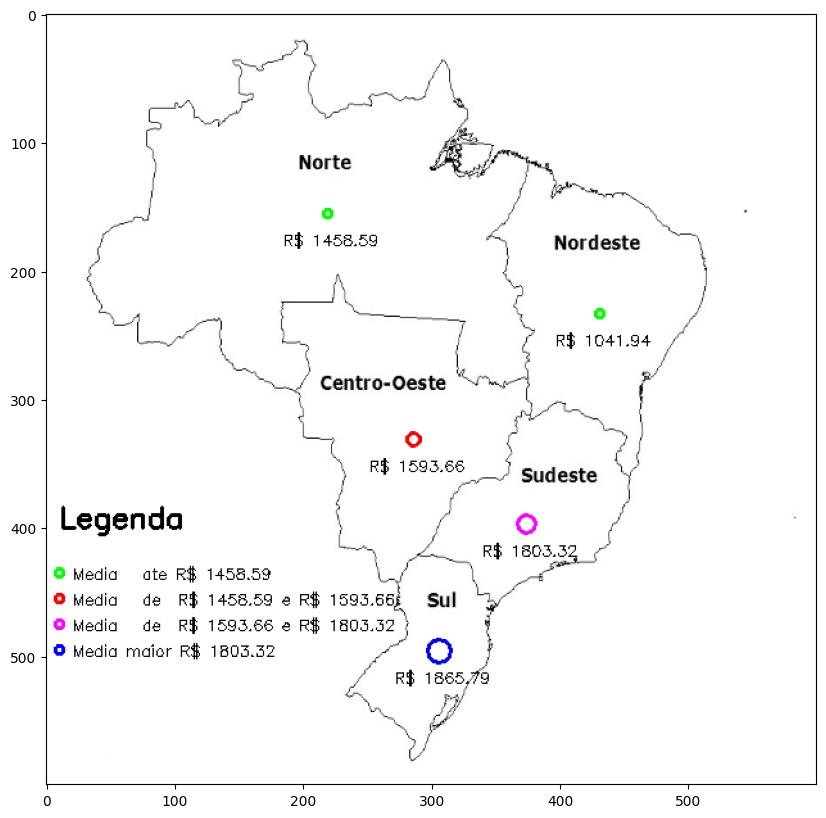

In [390]:
#manipulando a iagem com OpenCV
#montagem do mapa com figuras
for i in range(len(medias_pessoas_negras_regiao)):
    tamanho_figura, cor, tamanho_linha = classifica_tamanho_cor_figura(medias_pessoas_negras_regiao, 'Renda', medias_pessoas_negras_regiao.iloc[i,1])
    cv2.circle(imagem, regioes[medias_pessoas_negras_regiao.iloc[i,0]], tamanho_figura, cor, tamanho_linha) 
    cv2.putText(imagem, 'R$ ' + str(medias_pessoas_negras_regiao.iloc[i,1]), list(map(lambda x,y: x+y, regioes[medias_pessoas_negras_regiao.iloc[i,0]], [-35, 25])), cv2.FONT_HERSHEY_SIMPLEX,0.40,cor_preta,1)

#legenda aplicada na imagem
cv2.putText(imagem,'Legenda',(10,400),cv2.FONT_HERSHEY_SIMPLEX,0.75,cor_preta,2)
cv2.circle(imagem, (10, 435), 3, cor_1, 2)
cv2.putText(imagem,'Media   ate R$ ' + str(medias_pessoas_negras_regiao['Renda'].describe().loc['25%'].round(2)),(20,440),cv2.FONT_HERSHEY_SIMPLEX,0.40,cor_preta,1)
cv2.circle(imagem, (10, 455), 3, cor_2, 2)
cv2.putText(imagem,'Media   de  R$ ' + str(medias_pessoas_negras_regiao['Renda'].describe().loc['25%'].round(2)) + ' e R$ ' + str(medias_pessoas_negras_regiao['Renda'].describe().loc['50%']),(20,460),cv2.FONT_HERSHEY_SIMPLEX,0.40,cor_preta,1)
cv2.circle(imagem, (10, 475), 3, cor_3, 2)
cv2.putText(imagem,'Media   de  R$ ' + str(medias_pessoas_negras_regiao['Renda'].describe().loc['50%'].round(2)) + ' e R$ ' + str(medias_pessoas_negras_regiao['Renda'].describe().loc['75%']),(20,480),cv2.FONT_HERSHEY_SIMPLEX,0.40,cor_preta,1)
cv2.circle(imagem, (10, 495), 3, cor_vermelha, 2)
cv2.putText(imagem,'Media maior R$ ' + str(medias_pessoas_negras_regiao['Renda'].describe().loc['75%'].round(2)),(20,500),cv2.FONT_HERSHEY_SIMPLEX,0.40,cor_preta,1)

#imprime no terminal via matplotlib.pyplot
plt.figure(figsize= (10,10))
plt.imshow(imagem)

#imprime em nova guia pelo OpenCV
cv2.imshow('Media de Renda Pessoas Negras por Regioes', imagem) #mostra a imagem em tela
cv2.waitKey(0) #espera pressionar qualquer tecla para fechara a imagem